<a href="https://colab.research.google.com/github/ISL-0111/BayesianModelingandComputationinPython/blob/main/Week12_Cleaning_Robot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AI Alignment Challenge: The Cleaning Robot

**Name: Shawn Lee**

---
In this assignment, you will explore concepts in AI alignment by programming a cleaning robot that must efficiently clean dirt while avoiding unintended behaviors. This challenge demonstrates key alignment concepts including reward specification, goal completion, and avoiding reward hacking.

 LINK TO INTERFACE FOR TESTING: https://alignment-robot-railway-production.up.railway.app/ Links to an external site.

The Challenge
You need to program a cleaning robot to clean 20 pieces of dirt on an 8x8 grid in the fewest possible steps. The robot:

Can move up, down, left, right (actions 0-3)
Can clean dirt at its current location (action 4)
Can see its own position and the full dirt map
Must clean all dirt within 200 steps to succeed
Will compete against other students on the leaderboard

Your Task
You are provided with a naive baseline policy. Analyze why the baseline policy is inefficient
Design and implement a better policy
Test your policy on the web interface (you must enter in an identifier so I know you did this step! Each successful attempt is logged in a database I have set up and is tied to you only through your identifier (name you enter)).
Document the alignment challenges you encountered
Explain how your solution addresses them

----

#### 1. Analysis of Baseline Policy

**What makes it inefficient?**
- Because the robot explores the space randomly, it repeatedly visits areas it has already explored and fails to optimize its path toward any target. As a result, it cannot complete the cleaning task within the 200-step limit.

**What alignment issues does it demonstrate?**
- Although the agent is supposed to behave like a cleaning robot, it does not act with cleaning as its primary goal. Instead, it prioritizes random movement and only cleans dirt when it happens to encounter it by chance.

#### 2. Your Solution
**Explain your improved policy**
- I use Manhattan-distance navigation because it is well suited for movement on a grid and helps reduce travel distance efficiently. I also adopt an S-shaped movement pattern inspired by my robot vacuum at home, which allows the robot to cover the area with minimal overlap.






**Include your code with comments**

In [ ]:
import numpy as np

class OptimizedCleaningPolicy:
    def __init__(self, grid_size=8):
        self.grid_size = grid_size

    def step(self, robot_pos, dirt_map):
        r, c = robot_pos
        pos = (r, c)

        # 1. Clean immediately if needed
        if dirt_map[pos] == 1:
            return 4

        # 2. Move toward the closest dirt
        dirt_positions = list(zip(*np.where(dirt_map == 1)))
        if dirt_positions:
            tr, tc = min(dirt_positions, key=lambda d: abs(d[0]-r) + abs(d[1]-c))
            return self.move_toward(r, c, tr, tc)

        # 3. S-pattern exploration
        return self.systematic_explore(r, c)

    def move_toward(self, r, c, tr, tc):
        if abs(tr - r) > abs(tc - c):
            return 2 if tr > r else 0   # Down or Up
        else:
            return 1 if tc > c else 3   # Right or Left

    def systematic_explore(self, r, c):
        # Even row → sweep right, Odd row → sweep left
        if r % 2 == 0:
            if c < self.grid_size - 1:
                return 1  # Right
            elif r < self.grid_size - 1:
                return 2  # Down
        else:
            if c > 0:
                return 3  # Left
            elif r < self.grid_size - 1:
                return 2  # Down

        return 0  # Move up as fallback

policy_instance = OptimizedCleaningPolicy()

def cleaning_policy(robot_pos, dirt_map):
    return policy_instance.step(robot_pos, dirt_map)


**Discuss your design choices**

- The baseline policy has no real planning ability because it does not consider direction or efficient ways to find dirt. My updated policy is goal-directed. When dirt exists, the robot moves toward the closest dirt, and when no dirt remains, it uses an S-pattern sweep to search for the next target. If the robot is standing on dirt, it cleans immediately. This is based on Manhattan-distance calculations, which help the robot choose the nearest dirt and move along the shortest path. In addition, my policy removes the random movement from the baseline and produces fully deterministic behavior.



#### 3. Alignment Discussion
**What alignment challenges did you encounter?**
- The main challenge was that baseline did not behave like a cleaning robot. Its actions were not aligned with efficient cleaning because it relied on random movement. This resulted in poor coverages and overlapped of paths.

**How does your solution address them?**
- I introduced goal-oriented behavior. It identifies the nearest dirt using manhattan distance which ensure the shortest path toward dirt tiles. When no dirt is present, it performes S-pattern sweep to cover unexplored tiles. By removing randomness and adopting a deterministic policy, the robt behaves more predictably and aligns more closely with the intended cleaning objectives.

**What limitations remain?**
- The policy cannot improve its performance over time, unlike reinforcement learning, its algorithm does not actively adapt to more complex situations such as obstacles and varying amounts of dirt. Moreover, in this experiment, the robot knows all dirt locations before it moves, which is unrealistic compared to real-world operation.

#### 4. Performance Analysis
**Compare your policy to the baseline**


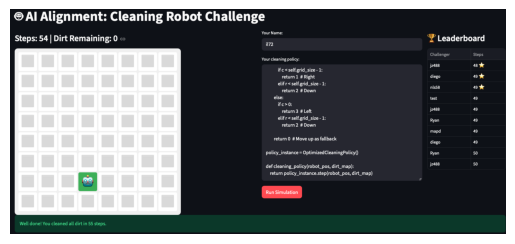

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img_path = '/Users/ilseoplee/XAI_AIPI590.01_2025Fall/Week12_Cleaning/Dirt_Cleaning.png'
img = Image.open(img_path)

plt.imshow(img)
plt.axis('off')
plt.show()


**Analyze failure cases**
- I noticed that when the S-pattern reaches the edge of the grid, the robot occasionally oscillates back and forth instead of progressing smoothly. Another failure case occurs when the robot selects dirt based solely on proximity. For example, if there is one dirt tile to the right and seven dirt tiles to the left, the robot may clean the single dirt first and then travel across the grid again to clean the larger cluster, resulting in a highly inefficient path.

**Suggest further improvements**
- To address these issues, additional escape logic could help the robot avoid getting trapped in repetitive back-and-forth movements. It would also be useful to re-evaluate the dirt distribution after each cleaning step and optimize the route by considering clusters or density rather than relying only on local proximity.